<a href="https://colab.research.google.com/github/Sakshi1007/Uplift-ML-Phase-1-Assignments/blob/main/BostonPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BOSTON PRICE PREDICTION

`Sakshi Singh`

##Mounting Drive

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
cd'/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [94]:
ls

 3b.1_Multivariate.ipynb              exercise1.ipynb
 3b_Multivariate.ipynb                exercise2.ipynb
 boston.csv                          "Let's_play.ipynb"
 BostonPrice.ipynb                   'Online Retail.ipynb'
'Copy of 3.1_Univariate.ipynb'        student-mat.csv
'Copy of 3b_Multivariate (1).ipynb'  'TASK 1.ipynb'
'Copy of 3b_Multivariate (2).ipynb'   Titanic_binary.ipynb
'Copy of 3b_Multivariate.ipynb'       univariate_MathData_2.csv
'Copy of tytanci1.ipynb'              Untitled0.ipynb


##Importing Dependencies




In [95]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt
import seaborn as sns
%matplotlib inline

###Importing DataSet

Input features in order:
* 1) CRIM: per capita crime rate by town
* 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* 3) INDUS: proportion of non-retail business acres per town
* 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* 6) ***RM***: average number of rooms per dwelling
* 7) AGE: proportion of owner-occupied units built prior to 1940
* 8) DIS: weighted distances to five Boston employment centres
* 9) ***RAD***: index of accessibility to radial highways
* 10) TAX: full-value property-tax rate per $10,000 [$/10k]
* 11) ***PTRATIO***: pupil-teacher ratio by town
* 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the       proportion of blacks by town
* 13) ***LSTAT***: % lower status of the population

Output variable:
* 1) MEDV: Median value of owner-occupied homes in $1000's [k$]







In [96]:
dataset=pd.read_csv('boston.csv')
dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [97]:
dataset.shape

(506, 14)

In [98]:
if dataset.isnull().sum().all()==0:
  print("There is no Null Values in Data")

There is no Null Values in Data


In [99]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [100]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


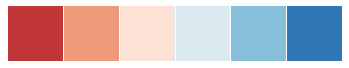

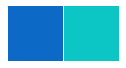

In [101]:
#To visualize our results 

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("RdBu"))
pal = sns.color_palette('RdBu', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#0c69c6", "#0cc6c6"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [102]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

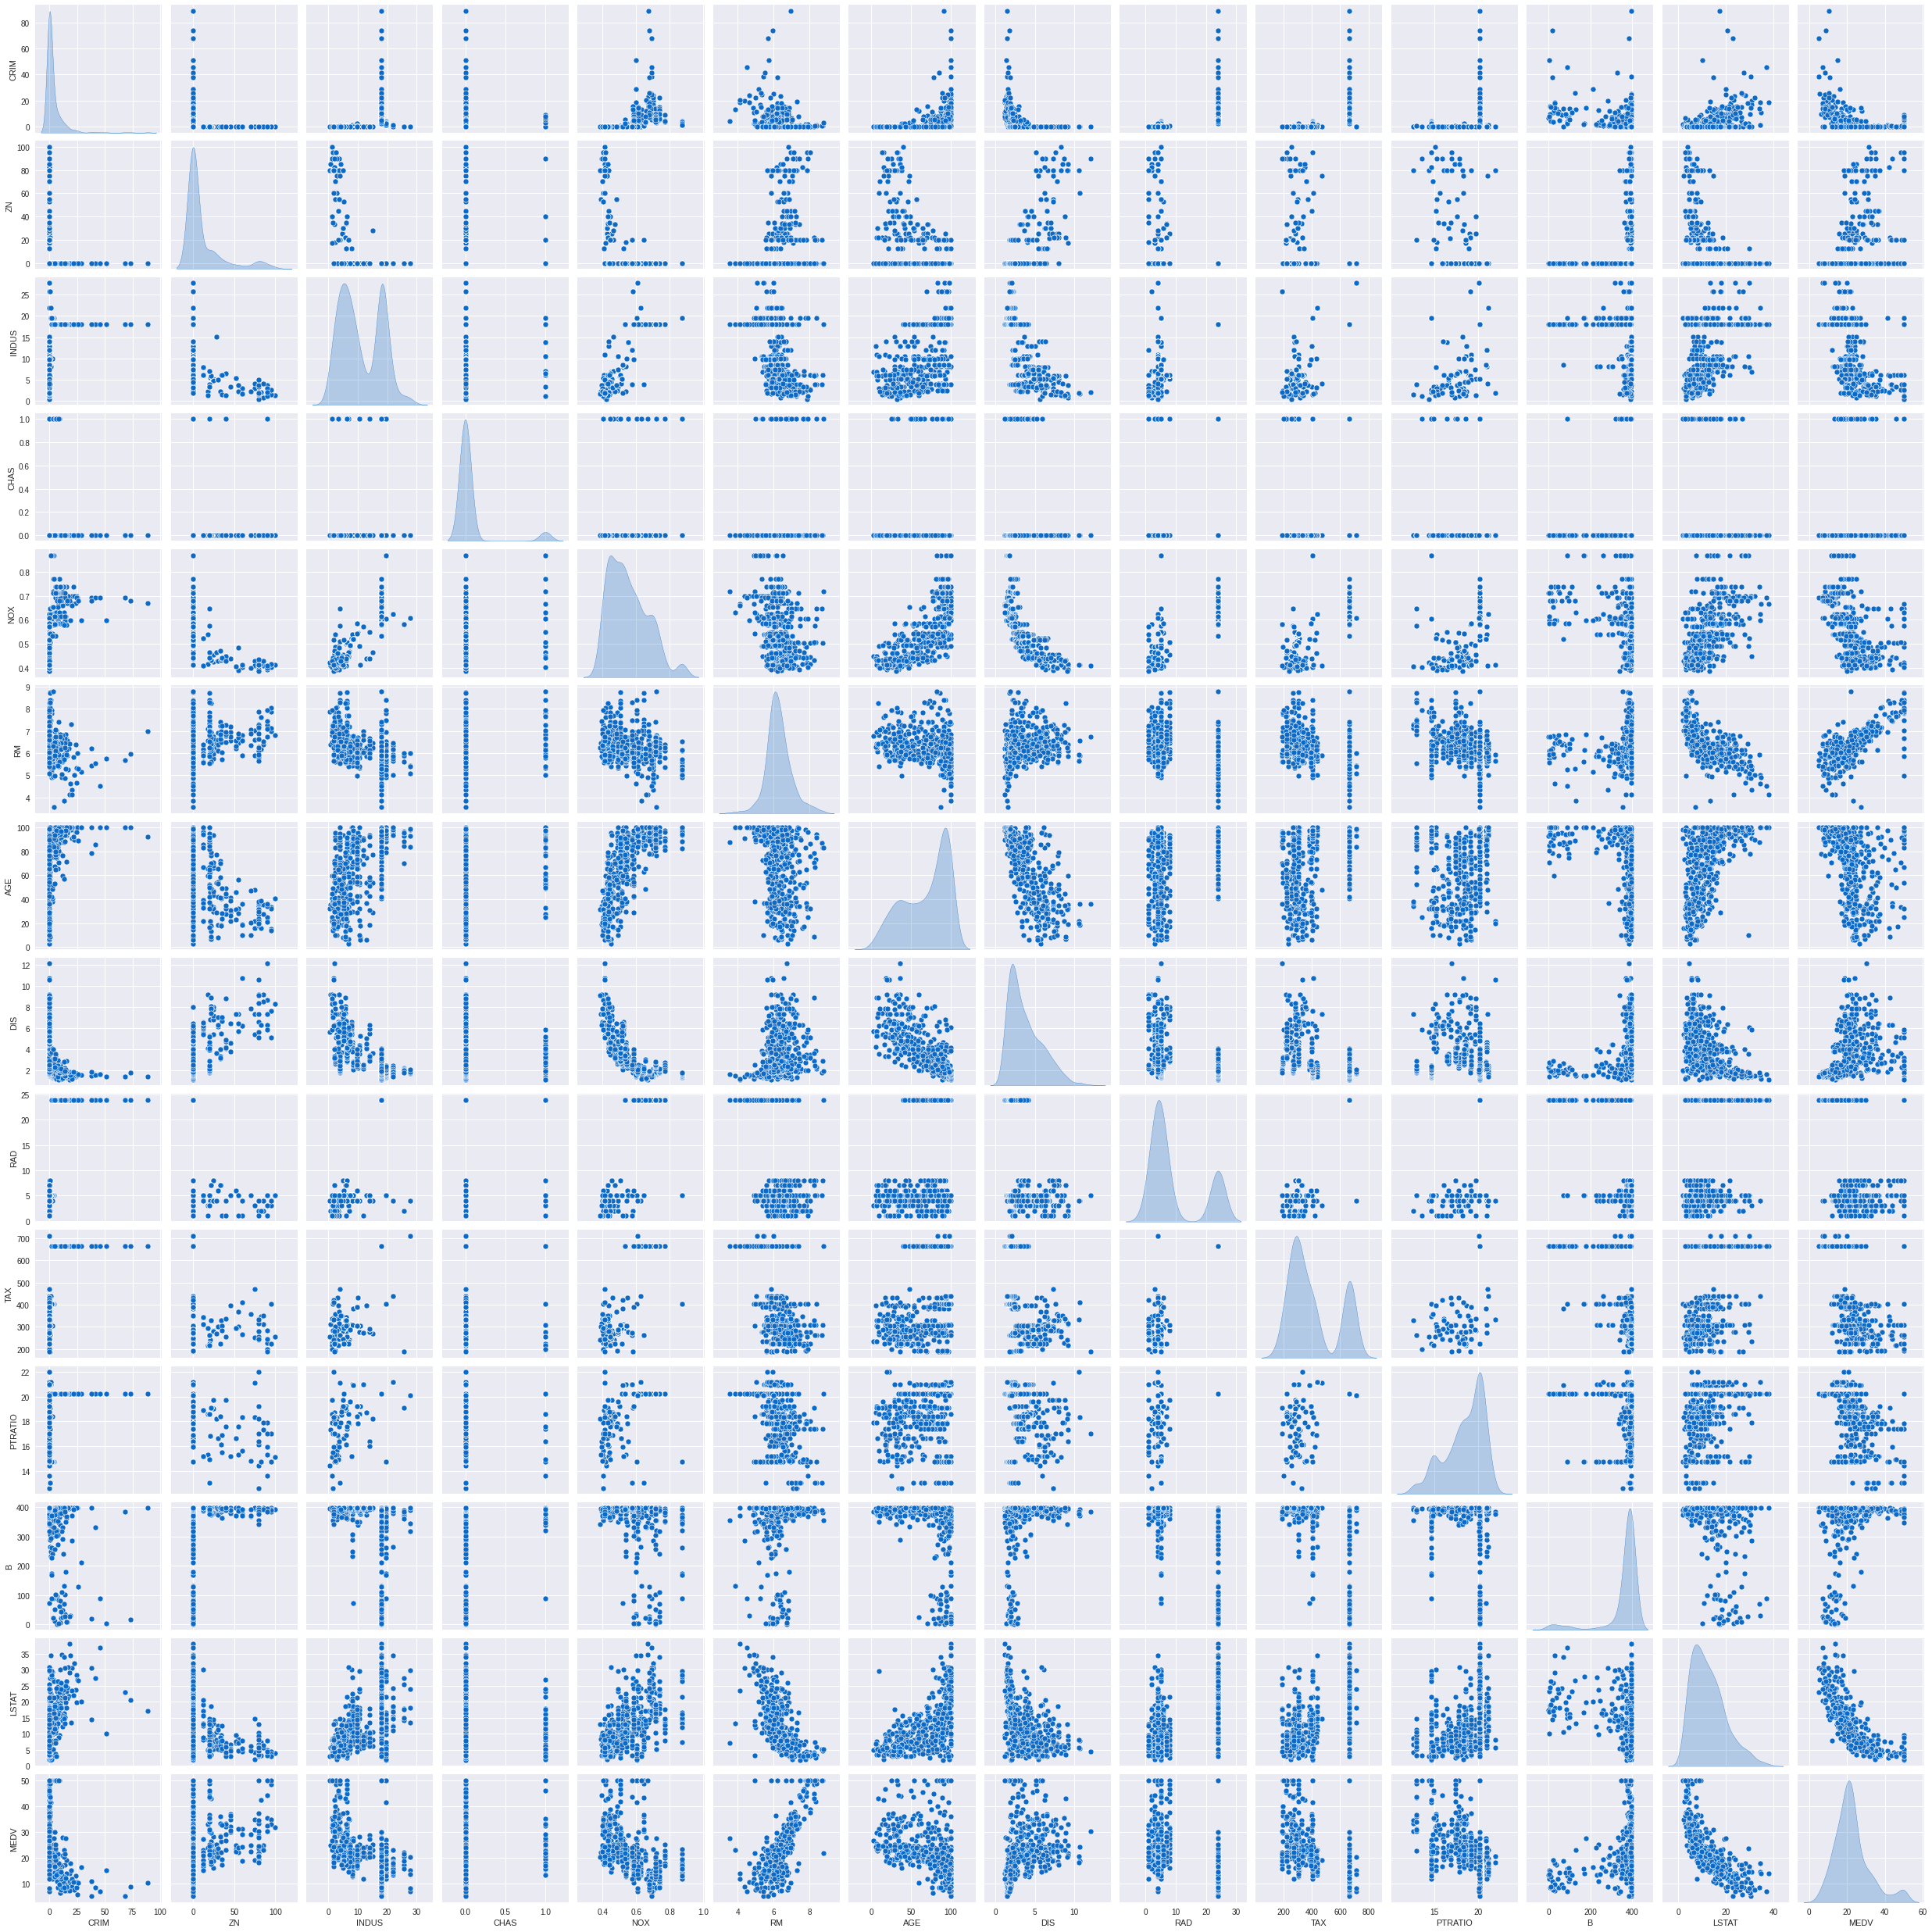

In [103]:
#pairplot for all the values

sns.pairplot(dataset,
             x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
             y_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       diag_kind='kde'
             )

Input features in order:
* 1) CRIM: per capita crime rate by town
* 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* 3) ***INDUS***: proportion of non-retail business acres per town
* 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* 6) ***RM***: average number of rooms per dwelling
* 7) AGE: proportion of owner-occupied units built prior to 1940
* 8) ***DIS***: weighted distances to five Boston employment centres
* 9) ***RAD***: index of accessibility to radial highways
* 10) TAX: full-value property-tax rate per $10,000 [$/10k]
* 11) ***PTRATIO***: pupil-teacher ratio by town
* 12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the       proportion of blacks by town
* 13) ***LSTAT***: % lower status of the population

Output variable:
* 1) MEDV: Median value of owner-occupied homes in $1000's [k$]







In [104]:
cleanData=dataset[['INDUS','RM','DIS','RAD','PTRATIO','LSTAT','MEDV']]
cleanData.head(10)

,INDUS,RM,DIS,RAD,PTRATIO,LSTAT,MEDV
0,2.31,6.575,4.0900,1,15.3,4.98,24.0
1,7.07,6.421,4.9671,2,17.8,9.14,21.6
2,7.07,7.185,4.9671,2,17.8,4.03,34.7
3,2.18,6.998,6.0622,3,18.7,2.94,33.4
4,2.18,7.147,6.0622,3,18.7,5.33,36.2
5,2.18,6.430,6.0622,3,18.7,5.21,28.7
6,7.87,6.012,5.5605,5,15.2,12.43,22.9
7,7.87,6.172,5.9505,5,15.2,19.15,27.1
8,7.87,5.631,6.0821,5,15.2,29.93,16.5
9,7.87,6.004,6.5921,5,15.2,17.10,18.9


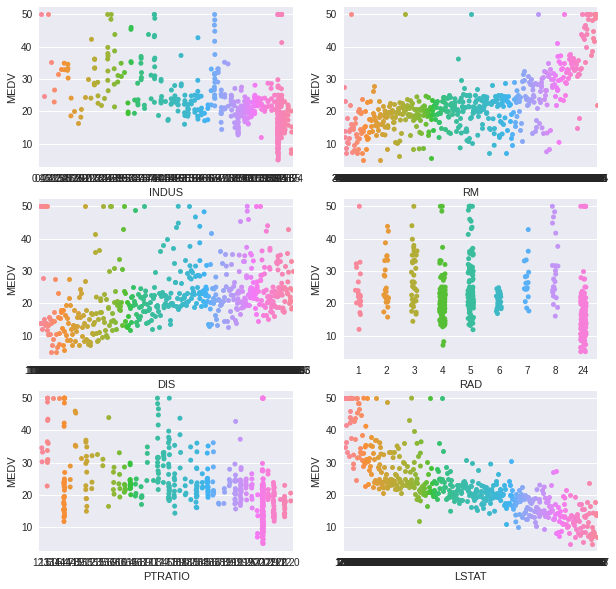

In [105]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(x='INDUS', y='MEDV', data=cleanData, hue=None, ax=axarr[0][0])
sns.stripplot(x='RM', y='MEDV', data=cleanData, hue=None, ax=axarr[0][1])
sns.stripplot(x='DIS', y='MEDV', data=cleanData, hue=None, ax=axarr[1][0])
sns.stripplot(x='RAD', y='MEDV', data=cleanData, hue=None,  ax=axarr[1][1])
sns.stripplot(x='PTRATIO', y='MEDV', data=cleanData, hue=None, ax=axarr[2][0])
sns.stripplot(x='LSTAT', y='MEDV', data=cleanData, hue=None, ax=axarr[2][1])

###DATA SPLIT

In [106]:
trainDataset = cleanData.sample(frac=0.8, random_state=0) 
testDataset = cleanData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     INDUS     RM     DIS  RAD  PTRATIO  LSTAT  MEDV
329   3.24  6.333  5.2146    4     16.9   7.34  22.6
371  18.10  6.216  1.1691   24     20.2   9.53  50.0
219  13.89  6.373  3.3633    5     16.4  10.50  23.0
403  18.10  5.349  1.7028   24     20.2  19.77   8.3
78   12.83  6.232  5.0141    5     18.7  12.34  21.2
    INDUS     RM     DIS  RAD  PTRATIO  LSTAT  MEDV
9    7.87  6.004  6.5921    5     15.2  17.10  18.9
25   8.14  5.599  4.4546    4     21.0  16.51  13.9
28   8.14  6.495  4.4547    4     21.0  12.80  18.4
31   8.14  6.072  4.1750    4     21.0  13.04  14.5
32   8.14  5.950  3.9900    4     21.0  27.71  13.2


In [107]:

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     INDUS     RM     DIS  RAD  PTRATIO  LSTAT  MEDV
329   3.24  6.333  5.2146    4     16.9   7.34  22.6
371  18.10  6.216  1.1691   24     20.2   9.53  50.0
219  13.89  6.373  3.3633    5     16.4  10.50  23.0
403  18.10  5.349  1.7028   24     20.2  19.77   8.3
78   12.83  6.232  5.0141    5     18.7  12.34  21.2
    INDUS     RM     DIS  RAD  PTRATIO  LSTAT  MEDV
9    7.87  6.004  6.5921    5     15.2  17.10  18.9
25   8.14  5.599  4.4546    4     21.0  16.51  13.9
28   8.14  6.495  4.4547    4     21.0  12.80  18.4
31   8.14  6.072  4.1750    4     21.0  13.04  14.5
32   8.14  5.950  3.9900    4     21.0  27.71  13.2


In [108]:
#removing the MEDV column and saving it into the labels variable

trainLabels = trainFeatures.pop('MEDV')
testLabels = testFeatures.pop('MEDV')

print(trainLabels.head())
print(testLabels.head())

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: MEDV, dtype: float64
9     18.9
25    13.9
28    18.4
31    14.5
32    13.2
Name: MEDV, dtype: float64


In [109]:
print(trainFeatures.head())
print(testFeatures.head())

     INDUS     RM     DIS  RAD  PTRATIO  LSTAT
329   3.24  6.333  5.2146    4     16.9   7.34
371  18.10  6.216  1.1691   24     20.2   9.53
219  13.89  6.373  3.3633    5     16.4  10.50
403  18.10  5.349  1.7028   24     20.2  19.77
78   12.83  6.232  5.0141    5     18.7  12.34
    INDUS     RM     DIS  RAD  PTRATIO  LSTAT
9    7.87  6.004  6.5921    5     15.2  17.10
25   8.14  5.599  4.4546    4     21.0  16.51
28   8.14  6.495  4.4547    4     21.0  12.80
31   8.14  6.072  4.1750    4     21.0  13.04
32   8.14  5.950  3.9900    4     21.0  27.71


##Model Development

In [110]:
import math
numFeatures=len(trainFeatures.columns)
inputNeuron=math.ceil((2*numFeatures)/3)
print(inputNeuron)

4


In [111]:
model=tf.keras.Sequential([tf.keras.layers.Dense(units=inputNeuron,  activation='relu'),
                           tf.keras.layers.Dense(units=2*inputNeuron, activation='relu'),
                           tf.keras.layers.Dense(1) ])

In [112]:
model.compile(
    loss='mean_absolute_error',
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.001,nesterov=False,name="SGD"),
    metrics=['mae','mse']
)

In [113]:
#model.compile(
 #   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
  #  loss = 'mean_absolute_error',
   # metrics = ['mae', 'mse']
#)

In [114]:
print(trainFeatures.shape)
print(trainLabels.shape)

(405, 6)
(405,)


In [115]:
numEpochs = 800
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)

Epoch 1/800
13/13 [==============================] - 2s 94ms/step - loss: 21.3782 - mae: 21.3782 - mse: 553.7042 - val_loss: 11.0294 - val_mae: 11.0294 - val_mse: 219.8359
Epoch 2/800
13/13 [==============================] - 0s 5ms/step - loss: 8.7028 - mae: 8.7028 - mse: 136.7429 - val_loss: 10.6861 - val_mae: 10.6861 - val_mse: 165.0639
Epoch 3/800
13/13 [==============================] - 0s 3ms/step - loss: 8.1379 - mae: 8.1379 - mse: 116.3857 - val_loss: 6.6207 - val_mae: 6.6207 - val_mse: 92.7907
Epoch 4/800
13/13 [==============================] - 0s 5ms/step - loss: 6.8462 - mae: 6.8462 - mse: 88.3043 - val_loss: 6.0183 - val_mae: 6.0183 - val_mse: 94.2348
Epoch 5/800
13/13 [==============================] - 0s 4ms/step - loss: 7.4089 - mae: 7.4089 - mse: 95.4926 - val_loss: 5.7036 - val_mae: 5.7036 - val_mse: 84.3097
Epoch 6/800
13/13 [==============================] - 0s 5ms/step - loss: 6.3387 - mae: 6.3387 - mse: 72.8307 - val_loss: 7.8106 - val_mae: 7.8106 - val_mse: 117.46

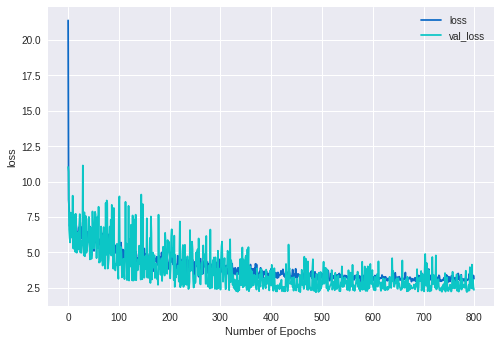

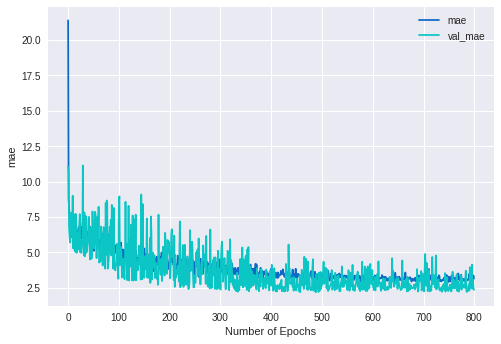

In [116]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [117]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[20.49847   18.528385  21.885872  20.587185  17.848858  21.038221
 30.414452  25.768276  20.72525   22.353596  34.0103    25.173157
 24.44471   25.133934  23.549591  23.707645  33.124607  26.49607
 34.6409    19.169266  19.69091   21.555653  19.39339   20.035686
 17.578522  20.135899  20.257414  14.791204  18.888577  50.97466
 24.010368  20.165504  22.742443  29.003475  35.96946   30.499798
 22.867786  39.86094   31.863644  46.00378   31.305141  42.25872
 44.42349   17.21111   21.956448  28.60659   18.035667  29.301037
 53.005318  49.00892   23.027798  45.50131   34.74212   33.64298
 26.31438   24.687664  33.667202  35.333103  29.61583   24.911308
 25.156197  19.599834  26.03455   24.809307  21.162483  20.30912
 21.400642  13.86758   22.496841  20.672073  43.963425  12.487747
 12.487747  12.487747  12.487747  13.009448  12.487747  12.487747
 18.757399  12.487747  12.487747  13.625655  12.487747  13.529908
 13.297491  12.892902  16.093695  14.260484  14.0428505 17.309464
 19.335335  19.

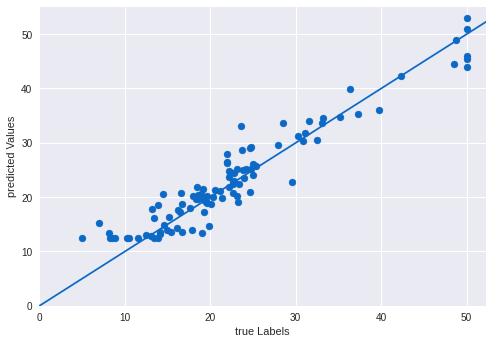

In [118]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

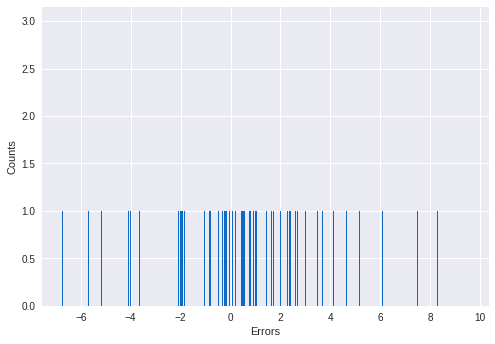

In [119]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)